## Panel 3B in Bloniasz, Oyama, Stephen (2024)

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

from filtered_point_process.PointProcess import PointProcessModel
from filtered_point_process.FPP import FilteredPointProcess


def find_intersection(x, y1, y2):
    idx = np.argwhere(np.diff(np.sign(y1 - y2))).flatten()
    return x[idx], y1[idx]

In [2]:
#### CIF Functions

# Parameters for the GABA simulation

# Define Simulation Method
method = 'AR(1)'


params_1 = {
    'method': 'AR(1)',
    'phi_1': 0.999,
    'white_noise_variance': 0.1,
    'fs': 1/0.0001,
    'T': 5,
    'Nsims': 1,
    'lambda_0': [200]
}

AMPA_model = PointProcessModel(params = params_1, seed=45)
AMPA_model.simulate_pp()  # Simulate the CIF model for model_1

# Define the filters to be used
AMPA_filters = {
    'AMPA': 'AMPA',
    '1/f': '1/f'
}

# Instantiate the FilteredPointProcess class with the specified filters and model
fpp_AMPA = FilteredPointProcess(filters=AMPA_filters, model=AMPA_model)

spectra_AMPA = fpp_AMPA.get_spectra()


/Users/patrick_bloniasz/miniforge3/envs/filtered-point-process/lib/python3.7/site-packages/filtered_point_process/PointProcess.py:9: UserWarning: Seed set globally to 45 for reproducibility.
  super()._set_seed(seed)
/Users/patrick_bloniasz/miniforge3/envs/filtered-point-process/lib/python3.7/site-packages/filtered_point_process/cif.py:19: UserWarning: Seed set globally to 45 for reproducibility.
  super()._set_seed(seed)
/Users/patrick_bloniasz/miniforge3/envs/filtered-point-process/lib/python3.7/site-packages/filtered_point_process/pp.py:23: UserWarning: Seed set globally to 45 for reproducibility.
  super()._set_seed(seed)


In [3]:
#### CIF Functions

# Parameters for the GABA simulation

# Define Simulation Method
method = 'AR(1)'


params_1 = {
    'method': 'AR(1)',
    'phi_1': 0.999,
    'white_noise_variance': 0.1,
    'fs': 1/0.0001,
    'T': 5,
    'Nsims': 1,
    'lambda_0': [50]
}

GABA_model = PointProcessModel(params = params_1, seed=45)
GABA_model.simulate_pp()  # Simulate the CIF model for model_1

# Define the filters to be used
GABA_filters = {
    'GABA': 'GABA',
    '1/f': '1/f'
}

# Instantiate the FilteredPointProcess class with the specified filters and model
fpp_GABA = FilteredPointProcess(filters=GABA_filters, model=GABA_model)

spectra_GABA = fpp_GABA.get_spectra()


# Filters

filters_GABA = fpp_GABA.get_filters()

filters_AMPA = fpp_AMPA.get_filters()

In [4]:
## Plot 1:

frequencies = fpp_GABA.model.params['frequencies']
total_spectrum_1 = spectra_GABA['pp * GABA'] + spectra_AMPA['pp * AMPA']
ampa_filtered_cif_1 = (fpp_AMPA.model.cif_PSD * filters_AMPA['AMPA']['power_spectrum']) / AMPA_model.params['fs']**2
gaba_filtered_cif_1 = (fpp_GABA.model.cif_PSD * filters_GABA['GABA']['power_spectrum']) / GABA_model.params['fs']**2
gaba_filter_1 = (filters_GABA['GABA']['power_spectrum'] * (fpp_GABA.model.pp_PSD - fpp_GABA.model.cif_PSD)) / GABA_model.params['fs']**2# spectra_GABA['pp * GABA']
ampa_filter_1 = (filters_AMPA['AMPA']['power_spectrum'] * (fpp_AMPA.model.pp_PSD - fpp_AMPA.model.cif_PSD)) / GABA_model.params['fs']**2 # spectra_AMPA['pp * AMPA']

## Plot 2:

total_spectrum_2 = spectra_GABA['pp * GABA * 1/f'] + spectra_AMPA['pp * AMPA * 1/f']
ampa_filtered_cif_2 = (fpp_AMPA.model.cif_PSD * filters_AMPA['AMPA']['power_spectrum'] * filters_AMPA['1/f']['power_spectrum']) / AMPA_model.params['fs']**2
gaba_filtered_cif_2 = (fpp_GABA.model.cif_PSD * filters_GABA['GABA']['power_spectrum'] * filters_GABA['1/f']['power_spectrum']) / GABA_model.params['fs']**2
gaba_process_2 = (filters_GABA['GABA']['power_spectrum'] * filters_GABA['1/f']['power_spectrum'] * (fpp_GABA.model.pp_PSD - fpp_GABA.model.cif_PSD)) / GABA_model.params['fs']**2# spectra_GABA['pp * GABA']
ampa_filter_2 = (filters_AMPA['AMPA']['power_spectrum'] * filters_AMPA['1/f']['power_spectrum'] * (fpp_AMPA.model.pp_PSD - fpp_AMPA.model.cif_PSD)) / GABA_model.params['fs']**2 # spectra_AMPA['pp * AMPA']



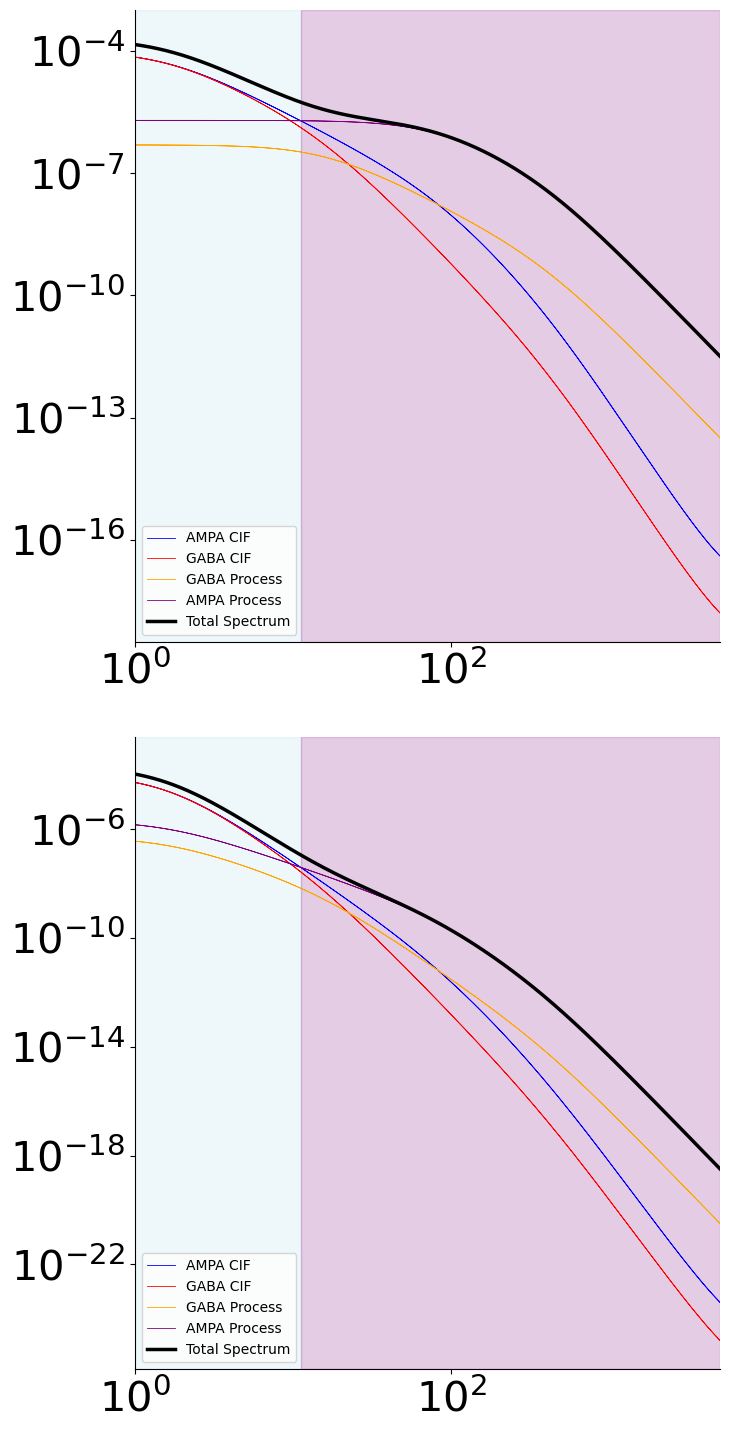

In [5]:

plt.rcParams['font.size'] = 30  # You can adjust the size as needed
plt.rcParams['axes.titlesize'] = 30  # For subplot titles
plt.rcParams['axes.labelsize'] = 30  # For x and y labels
plt.rcParams['xtick.labelsize'] = 30  # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 30 # For y-axis tick labels
plt.rcParams['legend.fontsize'] = 10  # For legend text
# Parameters
fs_half = AMPA_model.params['fs'] / 2

def plot_spectra(ax, frequencies, total_spectrum, filtered_cif_ampa, filtered_cif_gaba, process_gaba, process_ampa):
    # Prepare the data for shading
    lines = [filtered_cif_ampa, filtered_cif_gaba, process_gaba, process_ampa]
    line_labels = ['AMPA CIF', 'GABA CIF', 'GABA Process', 'AMPA Process']
    line_colors = ['blue', 'red', 'orange', 'purple']
    shading_colors = ['lightblue', 'lightcoral', 'yellow', 'purple']

    # Plot the data
    for line, label, color in zip(lines, line_labels, line_colors):
        ax.loglog(frequencies, line, label=label, alpha=1, color=color, linewidth=0.6)

    # Determine the dominant line at each frequency
    dominant_indices = np.argmax(np.vstack(lines), axis=0)

    # Find the cutoff index where the frequency exceeds fs/2
    cutoff_index = np.searchsorted(frequencies, fs_half)

    # Shading regions based on the dominant line
    start = 0
    for i in range(1, cutoff_index):
        if dominant_indices[i] != dominant_indices[start]:
            ax.axvspan(frequencies[start], frequencies[i], color=shading_colors[dominant_indices[start]], alpha=0.2)
            start = i

    # Handle the final segment up to fs/2
    if start < cutoff_index:
        ax.axvspan(frequencies[start], fs_half, color=shading_colors[dominant_indices[start]], alpha=0.2)

    # Plot total spectrum on top
    ax.loglog(frequencies[:cutoff_index], total_spectrum[:cutoff_index], label='Total Spectrum', alpha=1, color='black', linewidth=2.5, zorder=6)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Finalize plot
    ax.set_xlim([1, fs_half])
    ax.legend(loc='lower left')

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 15))

# Plot 1
plot_spectra(axs[0], frequencies, total_spectrum_1, ampa_filtered_cif_1, gaba_filtered_cif_1, gaba_filter_1, ampa_filter_1)

# Plot 2
plot_spectra(axs[1], frequencies, total_spectrum_2, ampa_filtered_cif_2, gaba_filtered_cif_2, gaba_process_2, ampa_filter_2)

# Apply tight layout
plt.tight_layout()
plt.show()
